In [1]:
import pandas as pd
import numpy as np
import scipy
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def flat_corr(data, method):
    data = data.T.corr(method=method, min_periods=5)
    data = np.tril(data, k = -1).flatten()
    data = data[(data!=0) & (~np.isnan(data))]
    return data

def gen_corr_df(data, method, name):
    data = flat_corr(data, method=method)
    
    corr_df = pd.DataFrame(data, columns = ['Correlation'])
    if method == 'pearson': method_name = "Pearson's R"
    elif method == 'spearman': method_name = "Spearman's R"
    corr_df['Method'] = [method_name] * len(corr_df)
    corr_df['Viability'] = [name] * len(corr_df)
    
    return corr_df

In [4]:
# PATH TO GDSC dataset downloaded from https://www.cancerrxgene.org/downloads/drug_data?screening_set=GDSC1
gdsc_drug_response = pd.read_csv('YOUR PATH')
# drug pathways, downloaded from the above link under Preview: drugs included in download (.csv)
drug_pathways = pd.read_csv('drug_pathways.csv') 

gdsc_drug_response['IC50/max con'] = gdsc_drug_response['IC50'] / gdsc_drug_response['Max Conc']
gdsc_drug_response['IC50 zscore'] = gdsc_drug_response['Z score']
gdsc_drug_response

,Drug Name,Drug ID,Cell Line Name,Cosmic ID,TCGA Classification,Tissue,Tissue Sub-type,IC50,AUC,Max Conc,RMSE,Z score,Dataset Version,IC50/max con,IC50 zscore
0,Erlotinib,1,ES5,684057,UNCLASSIFIED,bone,ewings_sarcoma,3.966813,0.985678,2.0,0.026081,1.299144,GDSC1,1.983406,1.299144
1,Erlotinib,1,ES7,684059,UNCLASSIFIED,bone,ewings_sarcoma,2.692090,0.972690,2.0,0.110059,0.156076,GDSC1,1.346045,0.156076
2,Erlotinib,1,EW-11,684062,UNCLASSIFIED,bone,ewings_sarcoma,2.477990,0.944459,2.0,0.087019,-0.035912,GDSC1,1.238995,-0.035912
3,Erlotinib,1,SK-ES-1,684072,UNCLASSIFIED,bone,ewings_sarcoma,2.033564,0.950758,2.0,0.016290,-0.434437,GDSC1,1.016782,-0.434437
4,Erlotinib,1,COLO-829,687448,SKCM,skin,melanoma,2.966007,0.954778,2.0,0.180255,0.401702,GDSC1,1.483003,0.401702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333287,I-CBP112,1531,SNU-1040,1659823,COREAD,digestive_system,large_intestine,5.085294,0.972251,10.0,0.040661,0.860626,GDSC1,0.508529,0.860626
333288,I-CBP112,1531,SNU-61,1660035,COREAD,digestive_system,large_intestine,5.725399,0.976109,10.0,0.045453,1.785602,GDSC1,0.572540,1.785602
333289,I-CBP112,1531,SNU-81,1660036,COREAD,digestive_system,large_intestine,4.930753,0.970851,10.0,0.038612,0.637308,GDSC1,0.493075,0.637308
333290,I-CBP112,1531,SNU-C5,1674021,COREAD,digestive_system,large_intestine,4.551784,0.972330,10.0,0.042649,0.089683,GDSC1,0.455178,0.089683


In [5]:
def pivot_column(colname, df):
    return gdsc_drug_response.pivot(index='Cosmic ID', values = colname, columns = 'Drug ID')

gdsc_IC50_df = pivot_column('IC50', gdsc_drug_response)
gdsc_IC50_df

Drug ID,1,3,5,6,9,11,17,29,30,32,...,1495,1496,1497,1498,1502,1526,1527,1529,1530,1531
Cosmic ID,,,,,,,,,,,,,,,,,,,,,
683667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.010083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.349978,-0.666270,1.877431,1.712663,4.215675,1.963601,-0.435702,-2.037157,4.272344,4.502007
684057,3.966813,0.584990,3.773630,2.695236,0.930484,0.678819,5.694270,2.665616,3.437794,3.722149,...,2.349629,1.149465,1.671475,3.401612,4.512388,4.226023,-0.722279,-0.543282,4.786753,4.700326
684059,2.692090,-0.026774,2.990953,2.490269,0.550531,0.074408,4.997813,2.392512,3.286797,2.981823,...,0.591728,-1.223006,1.414403,3.071024,4.126828,3.303773,-1.424201,-2.345298,4.652260,4.521558
684062,2.477990,-2.123181,3.600300,2.774900,0.232037,0.918106,5.714389,1.087475,4.147816,3.890122,...,2.777843,-0.942229,-1.781947,3.449701,3.270090,3.738364,-1.140185,-0.523266,3.448501,3.118946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.930669,1.616463,2.654281,0.553292,4.474743,-2.504900,1.140632,-0.271098,4.819004,NaN
1660035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.713087,3.834480,3.154436,1.789721,5.577863,1.573640,3.391511,3.144912,5.783120,5.725399
1660036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.489991,2.752124,3.044463,0.698579,4.641112,0.599032,0.138714,0.517574,5.391049,4.930753


In [24]:
gdsc_pears_corr_df = gen_corr_df(pivot_column('IC50', gdsc_drug_response), 'pearson', 'IC50')
gdsc_spear_corr_df = gen_corr_df(pivot_column('IC50', gdsc_drug_response), 'spearman', 'IC50')
gdsc_pears_zscore_corr_df = gen_corr_df(pivot_column('IC50 zscore', gdsc_drug_response), 'pearson', 'IC50 zscore')
gdsc_spear_zscore_corr_df = gen_corr_df(pivot_column('IC50 zscore', gdsc_drug_response), 'spearman', 'IC50 zscore')
gdsc_pears_mc_corr_df = gen_corr_df(pivot_column('IC50/max con', gdsc_drug_response), 'pearson', 'IC50/max con')
gdsc_spear_mc_corr_df = gen_corr_df(pivot_column('IC50/max con', gdsc_drug_response), 'spearman', 'IC50/max con')
gdsc_pears_auc_corr_df = gen_corr_df(pivot_column('AUC', gdsc_drug_response), 'pearson', 'AUC')
gdsc_spear_auc_corr_df = gen_corr_df(pivot_column('AUC', gdsc_drug_response), 'spearman', 'AUC')

In [30]:
gdsc_df = pd.concat([gdsc_pears_corr_df, gdsc_spear_corr_df, 
                     gdsc_pears_mc_corr_df, gdsc_spear_mc_corr_df,
                     gdsc_pears_auc_corr_df, gdsc_spear_auc_corr_df,
                     gdsc_pears_zscore_corr_df, gdsc_spear_zscore_corr_df,
                    ])

/var/folders/rp/n5c8n15j53ndhqzy0t3qglcw0000gq/T/ipykernel_12142/2830273130.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(axs.get_xticklabels())


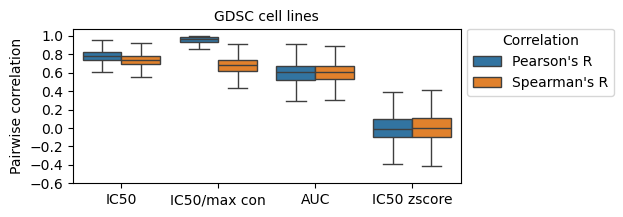

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (5, 2),)

sns.boxplot(x="Viability", y="Correlation", hue="Method", data=gdsc_df, ax = axs, 
            showfliers = False)  

axs.set_xlabel(None)
axs.set_ylabel('Pairwise correlation')
axs.set_title('GDSC cell lines', fontsize='10')
axs.set_xticklabels(axs.get_xticklabels())
axs.set_yticks([-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])
axs.grid(False)
axs.legend(bbox_to_anchor=(1, 1.05), title='Correlation', title_fontsize='10', fontsize='10')

In [44]:
ct_pears_corr_df = pd.DataFrame()
ct_spear_corr_df = pd.DataFrame()
for cancer_type, rows in gdsc_drug_response.groupby('TCGA Classification'):
    if cancer_type in ['UNCLASSIFIED', 'ALL', np.nan]: continue
    cl_ids = rows['Cosmic ID'].unique()
    if len(cl_ids)<5: continue
        
    loc_pears_corr_df = gen_corr_df(gdsc_IC50_df.loc[cl_ids], 'pearson', 'IC50')
    loc_pears_corr_df['Cancer type'] = [cancer_type] * len(loc_pears_corr_df)
    ct_pears_corr_df = pd.concat([ct_pears_corr_df, loc_pears_corr_df])
    
    loc_spear_corr_df = gen_corr_df(gdsc_IC50_df.loc[cl_ids], 'spearman', 'IC50')
    loc_spear_corr_df['Cancer type'] = [cancer_type] * len(loc_spear_corr_df)
    ct_spear_corr_df = pd.concat([ct_spear_corr_df, loc_spear_corr_df])
    
ct_corr_df = pd.concat([ct_pears_corr_df, ct_spear_corr_df])

/var/folders/rp/n5c8n15j53ndhqzy0t3qglcw0000gq/T/ipykernel_12142/2647434228.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(axs.get_xticklabels(), rotation=90)


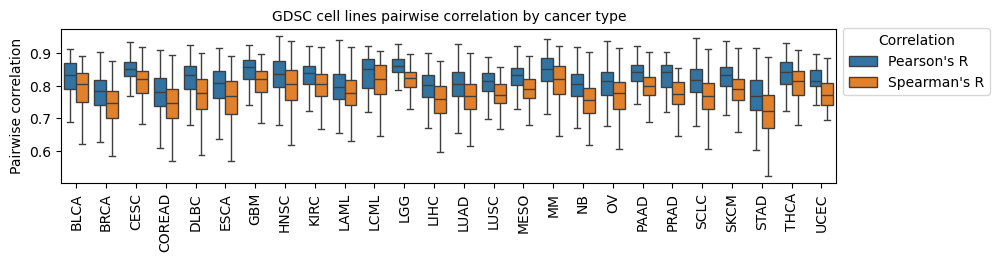

In [45]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (10, 2))

sns.boxplot(x="Cancer type", y="Correlation", hue="Method", data=ct_corr_df, ax = axs, 
            showfliers = False) 

axs.set_ylabel('Pairwise correlation')
axs.set_xlabel(None)
axs.set_xticklabels(axs.get_xticklabels(), rotation=90)
axs.grid(False)
axs.set_title('GDSC cell lines pairwise correlation by cancer type', fontsize='10')

axs.legend(bbox_to_anchor=(1, 1.05), title='Correlation', title_fontsize='10', fontsize='10')

Text(-8, 8, "Pearson's R=0.82 (pval=2.40e-83)\nExplained variance=0.66")

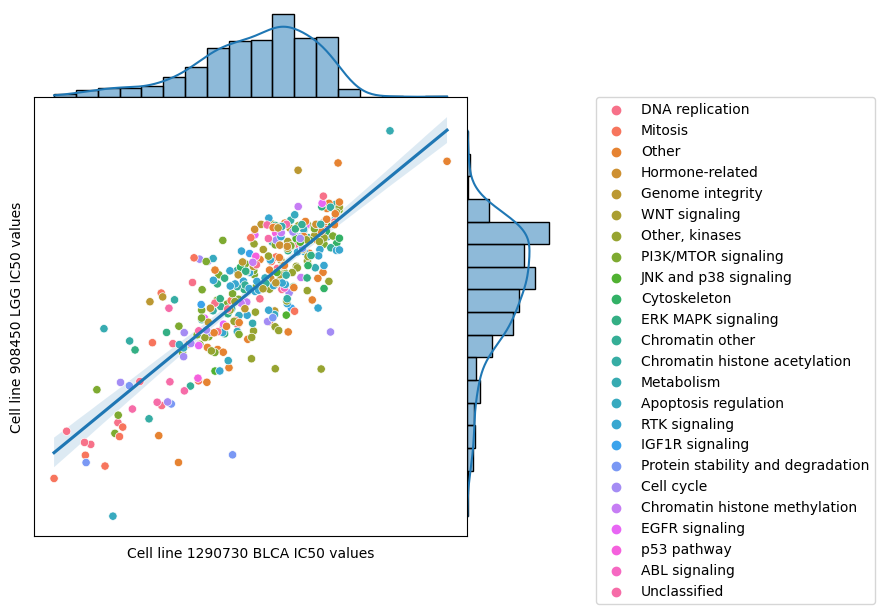

In [7]:
from sklearn.metrics import explained_variance_score
from scipy.stats import pearsonr

np.random.seed(0)
def random_cell_line(cancer_type):
    cell_lines = gdsc_drug_response[gdsc_drug_response['TCGA Classification'] == cancer_type]['Cosmic ID'].values
    return np.random.choice(cell_lines)

cl_id1 = random_cell_line('BLCA')
cl_id2 = random_cell_line('LGG')

#fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (3, 3))

data = gdsc_IC50_df.loc[[cl_id1, cl_id2]].dropna(axis=1).T

expl_var = explained_variance_score(data.T.loc[cl_id1], data.T.loc[cl_id2])
pearson = pearsonr(data.T.loc[cl_id1], data.T.loc[cl_id2])

data_drugs = data.join(drug_pathways.set_index('drug_id'))

axs = sns.jointplot(data=data_drugs, x=cl_id1, y=cl_id2, kind='reg', height=6, space=0, scatter_kws={'s': 1})
sns.scatterplot(data=data_drugs, x=cl_id1, y=cl_id2, hue='pathway_name')

plt.legend(bbox_to_anchor=(1.3, 1), loc=2, borderaxespad=0.)
axs.ax_joint.set_xlabel('Cell line %d BLCA IC50 values' % (cl_id1))
axs.ax_joint.set_ylabel('Cell line %d LGG IC50 values' % (cl_id2))
axs.ax_joint.grid(False)
axs.ax_joint.set_xticks([])
axs.ax_joint.set_yticks([])

stats_vals = "Pearson's R=%.2f (pval=%.2e)\nExplained variance=%.2f" % (pearson[0], pearson[1], expl_var)

axs.ax_joint.annotate(stats_vals, 
             (-8, 8)) 